# Importing the data and libraries 

In [271]:
# general pandas frameworks 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# hypothesis testing
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import chi2_contingency 
from scipy import stats
from scipy.special import inv_boxcox
import scipy
scipy.__version__

# Import modeling tools
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, GridSearchCV,cross_val_score, learning_curve
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Run the following two lines of code for Uncaught Error: Script error for plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [272]:
df = pd.read_csv('/Users/christianrim/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [275]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [276]:
def check_data(df):
    print('-' * 38+'Head'+'-' * 39)
    print(df.head(3))
    print('-' * 38+'info'+'-' * 38)
    print(df.info())
    print('-' * 38+'describe'+'-' * 38)
    print(df.describe())

In [277]:
check_data(df)

--------------------------------------Head---------------------------------------
   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620
--------------------------------------info--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
--------------------------------------describe------------------

In [279]:
# listing the categorical columns 
for i in ['smoker','sex','region']:
    print('-' * 80)
    print(df['smoker'].value_counts())

--------------------------------------------------------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
--------------------------------------------------------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
--------------------------------------------------------------------------------
no     1064
yes     274
Name: smoker, dtype: int64


In [280]:
males = df.loc[ df['sex'] == 'male'].copy()
females = df.loc[ df['sex'] == 'female'].copy()

In [281]:
smok = df.loc[ df['smoker'] == 'yes'].copy()
non_smok = df.loc[ df['smoker'] == 'no'].copy()

### Visualizing the data

In [284]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [286]:
southeast_df = df.loc[ df['region'] == 'southeast'].copy()
southwest_df = df.loc[ df['region'] == 'southwest'].copy()
northwest_df = df.loc[ df['region'] == 'northwest'].copy()
northeast_df = df.loc[ df['region'] == 'northeast'].copy()


In [287]:
low_end = 55.0
high_end = 56.0

In [288]:
# creating a pie chart, displaying gender distribution of people with health insurance 
import plotly.express as px
fig = px.pie(df['sex'].value_counts().reset_index(), values='sex', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Gender Distribution of policy holders')
fig.show()

In [290]:
fig = px.pie(df['region'].value_counts().reset_index(), values='region', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Region Distribution of policy holders')
fig.show()

### Visualization Insight
- The Gender pie chart shows that the gender distribution is similar. 
- Based on the Region Distribution chart, the region of the policy holders are mostly based in the southeast region. 
- In the smoker distribution chart, there are more non-smokers in the data. 

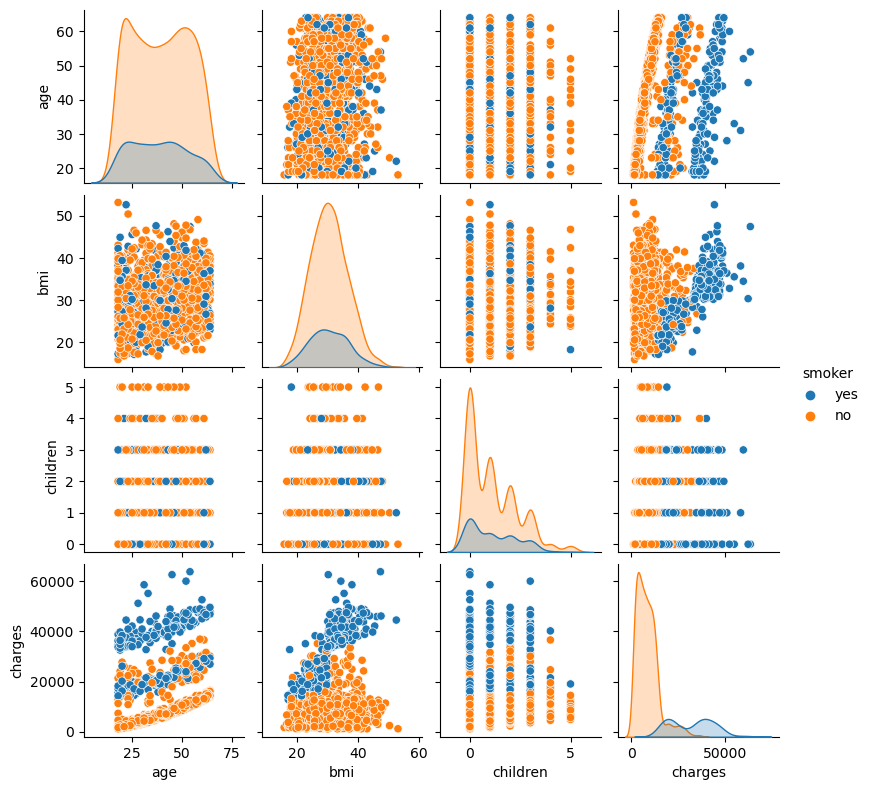

In [291]:
sns.pairplot(df.iloc[:,[0,2,3,4,6]], hue='smoker', diag_kind='kde',height=2)

## Data Summary:
- The correlations between age and charges and BMI are strong with upward trends. 
- Some densities are tail heavy in the right of medium. It will be harder for ML algorithms to detect patterns. I will display them in a bell-shaped curve distribution. 

## Checking for relationships between the charges and categorical attributes regions, sex, and smoker for more details.

In [292]:
# for each sex, finding the relationship between charges and bmi
fig = px.scatter(df, x="bmi", y="charges", color="smoker", facet_col= "region", facet_row= 'sex')
fig.show()

In [293]:
# for each sex, finding the relationship between charges and age
fig = px.scatter(df, x="age", y="charges", color="smoker", facet_col= "region", facet_row= 'sex')
fig.show()

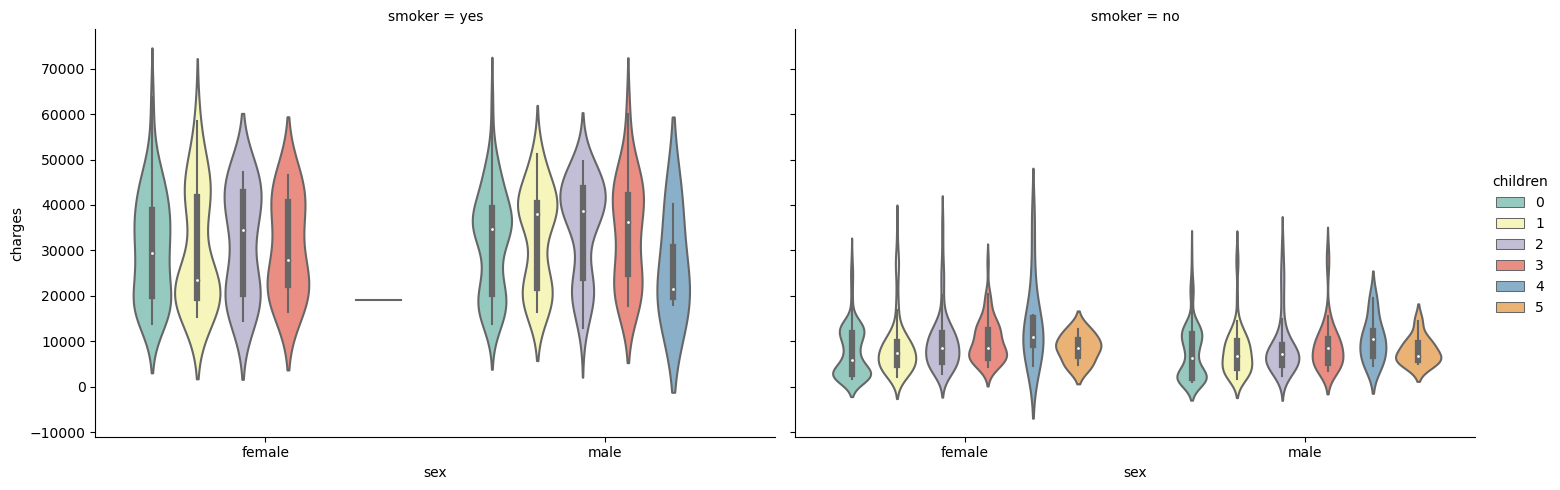

In [294]:
sns.catplot(x="sex", y="charges", hue="children",
                col="smoker", data=df, palette="Set3",
                height=5, aspect=1.5,  kind="violin")

In [296]:
import plotly.express as px
fig = px.pie(df['smoker'].value_counts().reset_index(), values='smoker', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Smoker Distribution of policy holders')
fig.show()

# Prepare the data for modeling 

- In a situation, I was told that the smoker is an important feature to predict charges. If the data was larger, I would use random sampling. Since there are 79.5% non-smokers and 20.5% smokers, random sampling might cause a significant sampling bias. 

In [295]:
# Random sampling 
random_state = 42
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = random_state)

# Stratified sampling
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=random_state)
for train_index, test_index in split.split(df, df["smoker"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

def smorker_proportions(data):
    return data['smoker'].value_counts()/len(data)

compare_props = pd.DataFrame({
    'Overall': smorker_proportions(df),
    'Random': smorker_proportions(test_set),
    'Stratied': smorker_proportions(strat_test_set)
})
compare_props['Rand.%error'] = 100*(compare_props['Random'] - compare_props['Overall'])/compare_props['Overall']
compare_props['Strat.%error'] = 100*(compare_props['Stratied'] - compare_props['Overall'])/compare_props['Overall']

compare_props

,Overall,Random,Stratied,Rand.%error,Strat.%error
no,0.795217,0.798507,0.794776,0.413814,-0.055409
yes,0.204783,0.201493,0.205224,-1.606929,0.215165


### Data Summary:
- As you see in this data, smoker category proportions in the test set by stratified sampling has almost identical to those in the total dataset. 

## Use box-cox to normalize target

In [297]:
fitted_data, fitted_lambda = stats.boxcox(strat_train_set['charges'])
strat_train_set['charges_tr']=fitted_data

Text(0.5, 1.0, 'Transformed data')

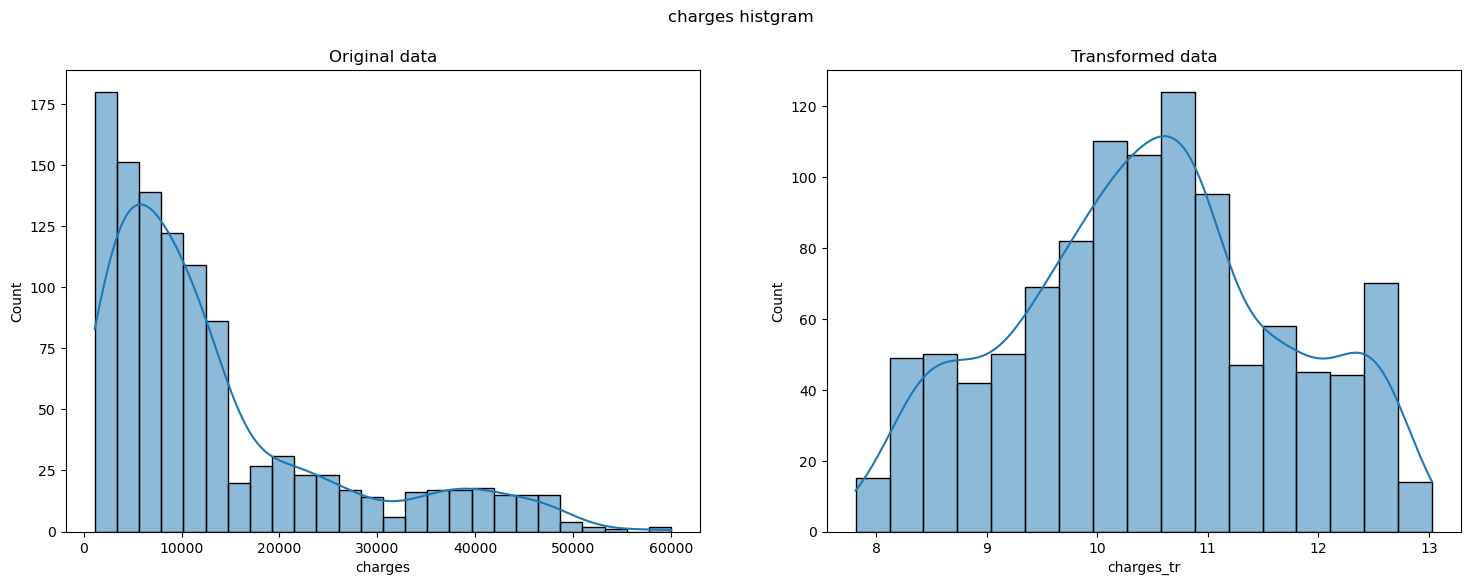

In [299]:
# normalizing the data through distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('charges histgram')

sns.histplot(ax=axes[0], data=strat_train_set, x='charges',kde=True)
axes[0].set_title('Original data')

sns.histplot(ax=axes[1], data=strat_train_set, x='charges_tr', kde=True)
axes[1].set_title('Transformed data')

Text(0.5, 1.0, 'Transformed data')

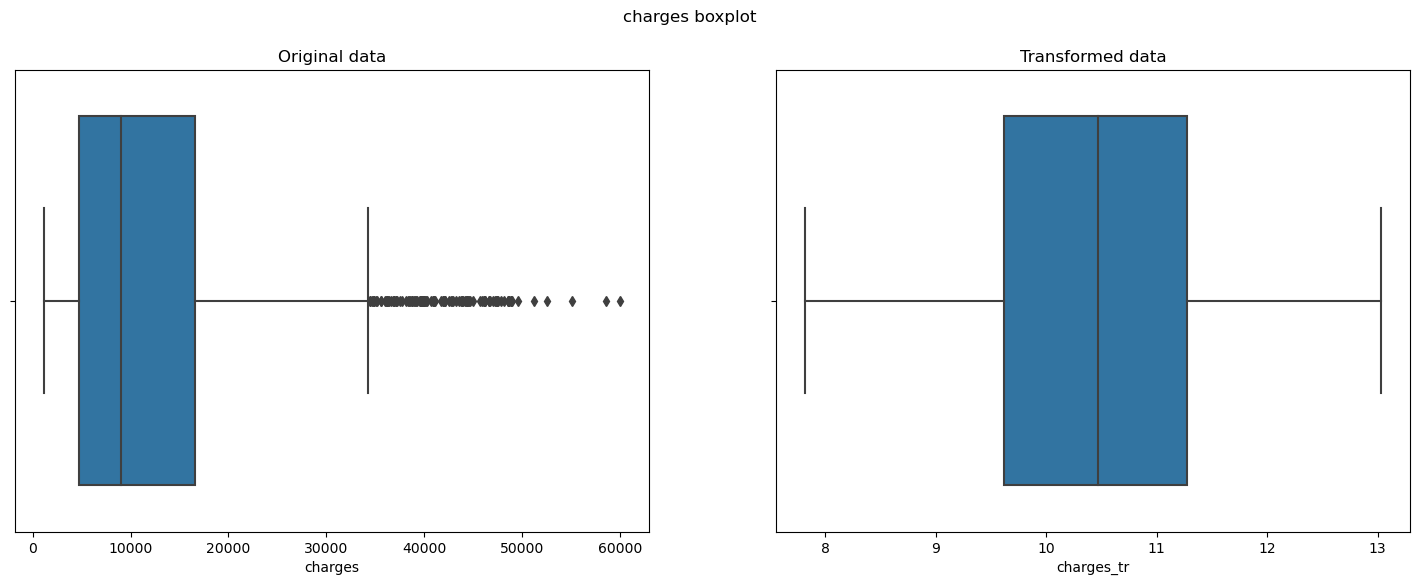

In [300]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('charges boxplot')

sns.boxplot(ax=axes[0], data=strat_train_set, x='charges')
axes[0].set_title('Original data')

sns.boxplot(ax=axes[1], data=strat_train_set, x='charges_tr')
axes[1].set_title('Transformed data')

# Do smokers have higher insurance charges than non-smokers?

### State the hypothesis and null hypothesis

- Null Hypothesis: There is no significant difference between smokers and charges. 
- Alternative Hypothesis: There is a significant difference between smokers and charges. 

### Determine the correct test

- Tupe of Data: Numerical
- How many groups/samples: 2
- We will be using a 2 sample t test. 

### Visualize and separate the data for hypothesis

In [23]:
fig = px.box(df,x='smoker',y='charges',color='sex')
fig.update_layout(title_text='Distribution of charges data')
fig.show()

In [25]:
## checking the charges column's descriptive stats
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [26]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [27]:
## creating a column that easily separates the smoker group
df['is_smoke'] = df['smoker'].str.contains('yes')
df['is_smoke'].value_counts()

False    1064
True      274
Name: is_smoke, dtype: int64

In [28]:
## saving the list of colums needed 
needed_cols = ['is_smoke','charges']
df[needed_cols]

,is_smoke,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [29]:
## saving people who smoke separately
smoke_df = df.loc[df['is_smoke'] ==True, needed_cols]
smoke_df

,is_smoke,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [30]:
non_smoke_df = df.loc[df['is_smoke'] == False, needed_cols]
non_smoke_df

,is_smoke,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [31]:
## making a dataframe for a visual by concatting the groups
plot_df =  pd.concat([smoke_df,non_smoke_df])
plot_df

,is_smoke,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot: xlabel='is_smoke', ylabel='charges'>

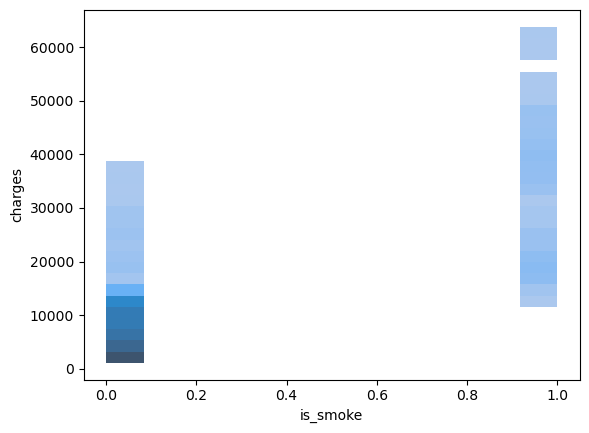

In [32]:
sns.histplot(data=plot_df, x='is_smoke',y='charges')

## Testing Assumption

### Checking Assumption of No Sig. Outliers

In [33]:
smoke_charges = smok['charges']
non_smoke_charges = non_smok['charges']

In [34]:
# checking for outliers in charges for the smoking group

zscores= stats.zscore(smoke_charges)
outliers = abs(zscores)>3
np.sum(outliers)


0

In [35]:
# checking for outliers in charges for the non-smoking group
zscores= stats.zscore(non_smoke_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [36]:
# remove outliers from the non smoker group
non_smoke_charges = non_smoke_charges[(np.abs(stats.zscore(non_smoke_charges)) < 3)]

### Test for Normality

In [37]:
# testing the smoker group for normality
result_smoker_charge = stats.normaltest(smoke_charges)
result_smoker_charge

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [38]:
result_no_smoker_charge = stats.normaltest(non_smoke_charges)
result_no_smoker_charge

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

- The P-value for both groups are well below 0.05 which means our data is not normally distributed.

### Check for Equal Variance

In [39]:
# Test for equal variance
result = stats.levene(smoke_charges, non_smoke_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

### Performing the T-Test

In [40]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoke_charges, non_smoke_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

- Our P-value is less than 0.05, so we reject the null hypothesis and accept the alternative hypothesis that smokers have higher insurance charges. 

# Are men more likely to smoke than women?

### State the hypothesis and null hypothesis

- Null Hypothesis: There is no significant difference between the distribution of who smokes more based on gender. 
- Alternative Hypothesis: There is a significant difference between the distribution of who smokes more based on gender. 

### Determine the correct test 

- Type of Data: Categorical
- How many groups/samples: 2 groups
- Therefore, will be using the Chi-Test

In [41]:
## descriptive stats for the 'smoker' column
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

- Type of Data: Numeric
- How many groups? 2 groups
- Therefore, a 2 sample t-test is right. 

### Visualize and separate the data for hypothesis

#### Separating the 'sex' column

In [42]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [43]:
## separating the sex column 
df['has_male'] = df['sex'].str.contains('male')
df['has_male'].value_counts()

## saving a list of columns
needed_cols = ['has_male','smoker']
df[needed_cols]

,has_male,smoker
0,True,yes
1,True,no
2,True,no
3,True,no
4,True,no
...,...,...
1333,True,no
1334,True,no
1335,True,no
1336,True,no


In [44]:
## saving the male team
male_df = df.loc[df['has_male'] == True, needed_cols]

female_df = df.loc[df['has_male'] == False, needed_cols]

plot_df =  pd.concat([female_df,male_df])
plot_df

,has_male,smoker
0,True,yes
1,True,no
2,True,no
3,True,no
4,True,no
...,...,...
1333,True,no
1334,True,no
1335,True,no
1336,True,no


### Visualize the smokers count

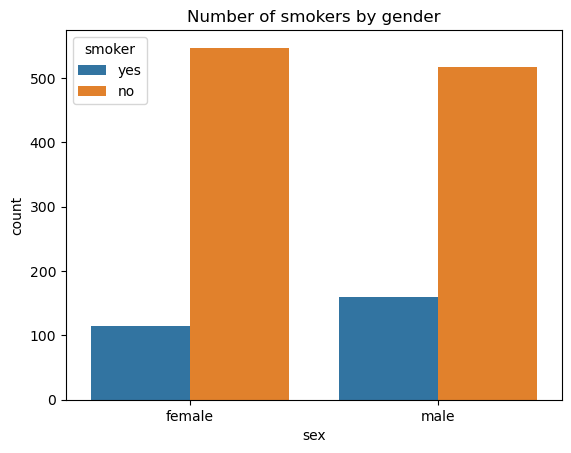

In [32]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers by gender");

## Testing Assumptions

### Test for Normality

In [45]:
# measuring the contingency table with the cross tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [46]:
# running the test and saving the result
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

In [47]:
# pvalue
print(p)
p<.05

0.006548143503580696


True

- The p-value is less than 0.05. Since our p < 0.05, we reject the null hypothesis that there is no relationship between smoking based on genders. 
- This means that we reject the null and accept the alternate hypothesis. I conclude that there more men are likely to smoke than women. 

# Do different regions have different charges, on average?

### State the hypothesis and null hypothesis

- Null Hypothesis: There is no statistical difference between the regions on charges. 

- Alternative Hypothesis: There is a statistical difference between the regions on charges. 

## Determine the correct test

- Type of Data: Numeric
- How many groups? 4 groups
- Therefore, Anova is the best test. 

### Visualize and separate the data for hypothesis

In [29]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [30]:
region_southeast_charge = southeast_df['charges']
region_southwest_charge = southwest_df['charges']
region_northwest_charge = northwest_df['charges']
region_northeast_charge = northeast_df['charges']

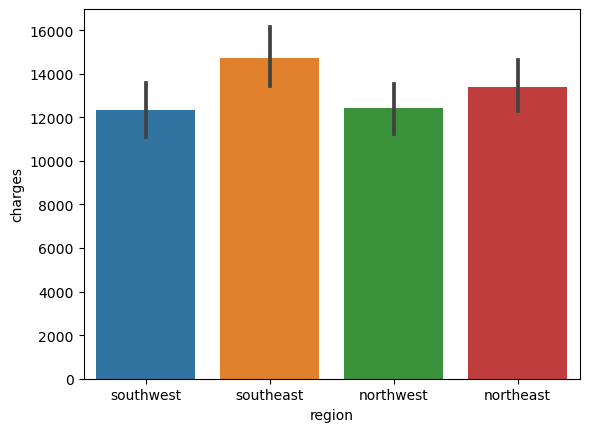

In [31]:
sns.barplot(data=df, x='region',y='charges');

In [32]:
## creating a groups dictionary
groups = {}
## looping through all unique categories
for i in df['region'].unique():
    ## getting the series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # saving
    groups[i] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Testing Assumptions

### Test for Normality

In [33]:
## running the normal test on each group and confirming there are > 20 in each region

### checking sig with pandas 
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


- Each region has a normal distribution

In [34]:
### checking to see each region has a normal distribution 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


### Testing Assumptions of Equal Variance

In [35]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

### ANOVA Test

In [36]:
# performing the anova test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

### Tukey's Pairwise Multiple Comparisons Test


In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [38]:
## performing the tukey's multiple comparison test
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


In [39]:
result_final = stats.kruskal(*groups.values())
result_final

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

- Based on the pvalue of the Kruskal Test, we fail to reject the null since the value is greater than the alpha.  We will accept the alternative hypothesis. 

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [256]:
from sklearn import preprocessing 
LE=preprocessing.LabelEncoder()
df['region'] = LE.fit_transform(df['region'])
df['sex'] = LE.fit_transform(df['sex'])
df['smoker'] = LE.fit_transform(df['smoker'])

In [333]:
# Preparing data for machine learning by separating input features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [334]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop = 'first'), [4])], remainder='passthrough', sparse_threshold = 0)
# sparse_threshold = 0 allows for six or more categories
#drop, drops the dummy variable (line above)
X = np.array(ct.fit_transform(X))

In [335]:
print(X)

[[ 1.   19.    0.   27.9   0.    3.  ]
 [ 0.   18.    1.   33.77  1.    2.  ]
 [ 0.   28.    1.   33.    3.    2.  ]
 ...
 [ 0.   18.    0.   36.85  0.    2.  ]
 [ 0.   21.    0.   25.8   0.    3.  ]
 [ 1.   61.    0.   29.07  0.    1.  ]]


In [343]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop = 'first'), [4])], remainder='passthrough', sparse_threshold = 0)
# sparse_threshold = 0 allows for six or more categories
#drop, drops the dummy variable (line above)
X = np.array(ct.fit_transform(X))

In [344]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

#X_train.columns = ['age', 'bmi','smoker']
#X_test.columns = ['age', 'bmi','smoker']

print(x.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1338, 6) (1338,)
(1070, 10) (1070,)
(268, 10) (268,)


In [345]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [346]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [347]:
# displaying two vectors: vectors of real insurance charge in test set, second is the predicted insurance charges
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_pred), 1)), 1))

[[ 9613.95  9095.07]
 [ 7079.22  5272.18]
 [36912.75 29330.98]
 [ 8817.49  9301.89]
 [26949.49 33750.29]
 [10612.51  4536.26]
 [  186.37  2117.34]
 [16905.28 14210.54]
 [ 1036.17  3732.63]
 [10575.01 10264.44]
 [27350.45 18259.22]
 [10085.62  7256.72]
 [ 5182.17  3947.41]
 [37744.97 46151.12]
 [40262.72 48673.56]
 [37804.97 44202.65]
 [15947.2   9800.89]
 [35832.73 42969.85]
 [ 9054.81  8233.1 ]
 [31493.69 21774.32]
 [ 2575.26  5080.1 ]
 [10728.82  7441.5 ]
 [ 2242.97  1256.3 ]
 [ 7005.85  2755.02]
 [10674.96 11085.59]
 [12884.36 10923.93]
 [14424.64 12644.59]
 [ 5501.12 18804.75]
 [10605.88  9715.84]
 [ 2170.13  1131.51]
 [10629.   15828.82]
 [13100.99 11842.62]
 [ 4555.9   2020.55]
 [ 2785.91  5693.43]
 [ 4240.66  2904.09]
 [12908.78  7448.4 ]
 [ 1780.57  2597.78]
 [ 8626.36  7337.75]
 [33221.14 23887.66]
 [32484.46 38709.18]
 [ 2628.57  4687.8 ]
 [ 4203.3   2643.27]
 [13951.09 11674.13]
 [11459.52 12124.99]
 [ 9472.16  4890.  ]
 [11921.55 12333.83]
 [ 5971.93  3579.83]
 [ 2404.11  4

In [348]:
# Variance score where 1.0 represents a perfect score (100%)
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Variance score: 0.78


In [349]:
# evaluating the model with the mean squared error 
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))

Mean squared error: 33782225.75


## Data Summary
- Based on the model results, I have around a 80% accuracy rate in the model. It is pretty high and can predict the various premium insurance charges. 